In [21]:
## In previous update of Sep 2022 : 2 hr 46 mins (15 lectures)
## In future update of July 2023 : 2 hr 50 mins  (15 lectures) (but it has more clear explaination)

 # 1.. lets read data..

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv(r'F:\Data_science_projects_datasets\Hotel_booking/hotel_bookings.csv')

In [24]:
## what is 'r' & why we use use it ?
## Ans : Just to get rid of this error(Unicode-decode error)


In [98]:
'''
due to diff diff file structure for diff diff OS 
as windows OS uses backward slash(\) to denote file path & Mac OS uses forward slash
to denote file path & this makes file structure so confusing,so just to get rid of this 
u can use concept of raw string !


Windows file_path : C:\Users\nyc\filename.csv
Mac file_path : /Users/nyc/filename.csv 



ie by adding 'r' , we can convert normal string into raw string  

bcz the moment we have raw string instead of normal string , out path will get understood as it is 
does not matter whether u are using mac or windows 

'''



SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 283-284: truncated \UXXXXXXXX escape (1737808184.py, line 17)

In [25]:
type(df)

pandas.core.frame.DataFrame

In [26]:
'''
explain various data structures in pandas :

Series 

Dataframe

'''

'\nexplain various data structures in pandas :\n\nSeries \n\nDataframe\n\n'

In [27]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015


In [28]:
df.shape

(119390, 32)

In [29]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# 2.. lets perform data cleaning..

In [30]:
df.duplicated().sum()

31994

In [31]:
df2 = df.drop_duplicates()

In [32]:
df2.shape

(87396, 32)

### Remove ir-relevant features or useless features ..

In [33]:
df2.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [34]:
df2.drop(['agent','company'], axis = 1 , inplace=True)

### most of the missing values of agent , company feature are missing ,so lets drop that.

C:\Users\mcr\AppData\Local\Temp\ipykernel_6540\2242315474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['agent','company'], axis = 1 , inplace=True)


### Filling missing values of "country" feature ..
     Since country have very less missing values  , hence u can fill it with the statistical approach which is mode..

In [35]:
df2['country'].value_counts().index[0]

'PRT'

In [36]:
df2['country'].fillna(df2['country'].value_counts().index[0] , inplace = True)

C:\Users\mcr\AppData\Local\Temp\ipykernel_6540\204794496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['country'].fillna(df2['country'].value_counts().index[0] , inplace = True)


In [37]:
df2.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### Lets remove ir-relevant rows !

In [38]:
### seems to have some dirtiness in data as Adults,babies & children cant be zero at a same time ..

### bcz if 3 entities are 0 ,then how can a booking be possible ??

In [39]:
### Visualise Entire Dataframe where adult,children & babies are 0

filter1 = (df2['children']==0) & (df2['adults']==0) & (df2['babies']==0)

In [40]:
df2[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [41]:
data = df2[~filter1]

In [42]:
data.shape

(87230, 30)

In [43]:
df2.shape

(87396, 30)

### Understanding various Data-types : 

In [44]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

In [45]:
'''
Categorical data has : Object & bool data-types 
Numerical data have : Integer & Float data-type


Categorical data refers to a data type that can be stored into groups/categories/labels 
Examples of categorical variables are  age group, blood type etc.. 


Numerical data refers to the data that is in the form of numbers, 
Examples of numerical data are height, weight, age etc.. 

Numerical data has two categories: discrete data and continuous data


Discrete data : It basically takes countable numbers like 1, 2, 3, 4, 5, and so on. 
                age of a fly : 8 , 9 day etc..
                
Continuous data : which is continuous in nature 
                  amount of sugar , 11.2 kg  , temp of a city  , your bank balance !
                  


'''

'\nCategorical data has : Object & bool data-types \nNumerical data have : Integer & Float data-type\n\n\nCategorical data refers to a data type that can be stored into groups/categories/labels \nExamples of categorical variables are  age group, blood type etc.. \n\n\nNumerical data refers to the data that is in the form of numbers, \nExamples of numerical data are height, weight, age etc.. \n\nNumerical data has two categories: discrete data and continuous data\n\n\nDiscrete data : It basically takes countable numbers like 1, 2, 3, 4, 5, and so on. \n                age of a fly : 8 , 9 day etc..\n                \nContinuous data : which is continuous in nature \n                  amount of sugar , 11.2 kg  , temp of a city  , your bank balance !\n                  \n\n\n'

In [46]:
'''

Variations of int are : ('int64','int32','int16') in numpy library..


Int16 is a 16 bit signed integer , it means it can store both positive & negative values
int16 has has a range of  (2^15 − 1) to -2^15 
int16 has a length of 16 bits (2 bytes).. ie Int16 uses 16 bits 


Int32 is a 32 bit signed integer , it means it storesboth positive & negative values
int32 has has a range of (2³¹ − 1) to  -2^31
int32 has a length of 32 bits (4 bytes),, ie Int32 uses 32 bits


Int64 is a 64 bit signed integer , it means it can store both positive & negative values
int64 has has a range of  (2^63 − 1) to -2^63 
int64 has a length of 64 bits (8 bytes) , ie Int64 uses 64 bits.
             

The only difference is that int64 has max range of storing numbers , then comes int32 , then 16 , then int8

That means that Int64’s take up twice as much memory-and doing 
operations on them may be a lot slower in some machine architectures.

However, Int64’s can represent numbers much more accurately than 
32 bit floats.They also allow much larger numbers to be stored..

'''


"\n\nVariations of int are : ('int64','int32','int16') in numpy library..\n\n\nInt16 is a 16 bit signed integer , it means it can store both positive & negative values\nint16 has has a range of  (2^15 − 1) to -2^15 \nint16 has a length of 16 bits (2 bytes).. ie Int16 uses 16 bits \n\n\nInt32 is a 32 bit signed integer , it means it storesboth positive & negative values\nint32 has has a range of (2³¹ − 1) to  -2^31\nint32 has a length of 32 bits (4 bytes),, ie Int32 uses 32 bits\n\n\nInt64 is a 64 bit signed integer , it means it can store both positive & negative values\nint64 has has a range of  (2^63 − 1) to -2^63 \nint64 has a length of 64 bits (8 bytes) , ie Int64 uses 64 bits.\n             \n\nThe only difference is that int64 has max range of storing numbers , then comes int32 , then 16 , then int8\n\nThat means that Int64’s take up twice as much memory-and doing \noperations on them may be a lot slower in some machine architectures.\n\nHowever, Int64’s can represent numbers muc

In [47]:
'''
Variations of float are :('float64','float32','float16') in numpy library..
By the way , all the variations of signed integers comes sub-class numpy.floating

Float16 is a 16-bit number ie it uses/occupies 16 bits in computer memory to store decimal number 
    (Also known as Half-precision floating-point format)
    
Float32 is a 32 bit number ie it uses/occupies 32 bits in computer memory to store decimal number 
    (Also known as Single-precision floating-point format)
    
Float64 is a 64 bit number ie it uses/occupies 64 bits in computer memory to store decimal number 
    (Also known as Double-precision floating-point format)


That means that float64’s take up twice as much memory-and doing 
operations on them may be a lot slower in some machine architectures.

However, float64’s can represent numbers much more accurately than 
32 bit floats.They also allow much larger numbers to be stored..



Note : Let say for float64 , If we will try to store a string value in float, or a decimal beyond what can be made using 64-bits, the program will either return an overflow error or return a rounded-off value of the original 

'''


"\nVariations of float are :('float64','float32','float16') in numpy library..\nBy the way , all the variations of signed integers comes sub-class numpy.floating\n\nFloat16 is a 16-bit number ie it uses/occupies 16 bits in computer memory to store decimal number \n    (Also known as Half-precision floating-point format)\n    \nFloat32 is a 32 bit number ie it uses/occupies 32 bits in computer memory to store decimal number \n    (Also known as Single-precision floating-point format)\n    \nFloat64 is a 64 bit number ie it uses/occupies 64 bits in computer memory to store decimal number \n    (Also known as Double-precision floating-point format)\n\n\nThat means that float64’s take up twice as much memory-and doing \noperations on them may be a lot slower in some machine architectures.\n\nHowever, float64’s can represent numbers much more accurately than \n32 bit floats.They also allow much larger numbers to be stored..\n\n\n\nNote : Let say for float64 , If we will try to store a strin

In [48]:
'''

Q.. Now u might ask what can be that default dtype for any array in any system ?
Ans: It is platform dependent , ie 

    In simple words If you Environment bit is 32 , then it shows np.int32
    and if your Environment bit is 64 , then it shows np.int64
    ie , It depend on your environment bits ..


'''

'\n\nQ.. Now u might ask what can be that default dtype for any array in any system ?\nAns: It is platform dependent , ie \n\n    In simple words If you Environment bit is 32 , then it shows np.int32\n    and if your Environment bit is 64 , then it shows np.int64\n    ie , It depend on your environment bits ..\n\n\n'

# 3.. Where do the guests come from ?

In [49]:
## Lets perform Spatial Analysis

In [50]:
data['is_canceled'].unique()

array([0, 1], dtype=int64)

In [51]:
data_valid = data[data['is_canceled']==0] 

## lets do analysis for only valid bookings ie which are not cancelled !

In [52]:
data_valid.shape

(63221, 30)

In [53]:
data_valid['country'].value_counts()/data_valid.shape[0]

PRT    0.284573
GBR    0.133500
FRA    0.112162
ESP    0.085130
DEU    0.068522
         ...   
ZMB    0.000016
SYC    0.000016
MDG    0.000016
SMR    0.000016
FRO    0.000016
Name: country, Length: 165, dtype: float64

In [54]:
'''
The above gives information about the location which bookings made in. 
According to that, there is an apparent difference in booking 
       location between Portugal ,Great Britain and the others.
Approx. 28% of all bookings made in the same location: Portugal.

'''

'\nThe above gives information about the location which bookings made in. \nAccording to that, there is an apparent difference in booking \n       location between Portugal ,Great Britain and the others.\nApprox. 28% of all bookings made in the same location: Portugal.\n\n'

In [55]:
country_wise_data = data_valid['country'].value_counts().reset_index()
country_wise_data.columns = ['country','no_of_guests']
country_wise_data

,country,no_of_guests
0,PRT,17991
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
160,ZMB,1
161,SYC,1
162,MDG,1
163,SMR,1


In [56]:
## !pip install plotly

In [57]:
## !pip install chart-studio

In [58]:
import plotly
import chart_studio.plotly as py
import plotly.express as px
from plotly.offline import download_plotlyjs ,init_notebook_mode ,plot ,iplot
init_notebook_mode(connected=True)

In [59]:
map_guest = px.choropleth(country_wise_data,
             locations = country_wise_data['country'],
             color = country_wise_data['no_of_guests'],
              hover_name = country_wise_data['country'],
              title = 'home country of guests'
             )

In [60]:
map_guest.show()

    Conclusion : People from all over the world are staying in these two hotels. Most guests are from Portugal and 
                 other countries in Europe

# 4.. How much do guests pay for a room per night ?

    Both hotels have different room types
    & the prices vary a lot as prices are heavily depend on "Seasonal factors"
    Since no currency information is given, but Portugal is part of the European Monetary Union, 
    I assume that all prices are in EURO..

In [61]:
data_valid.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0, 0.5, 'price( EUR)')

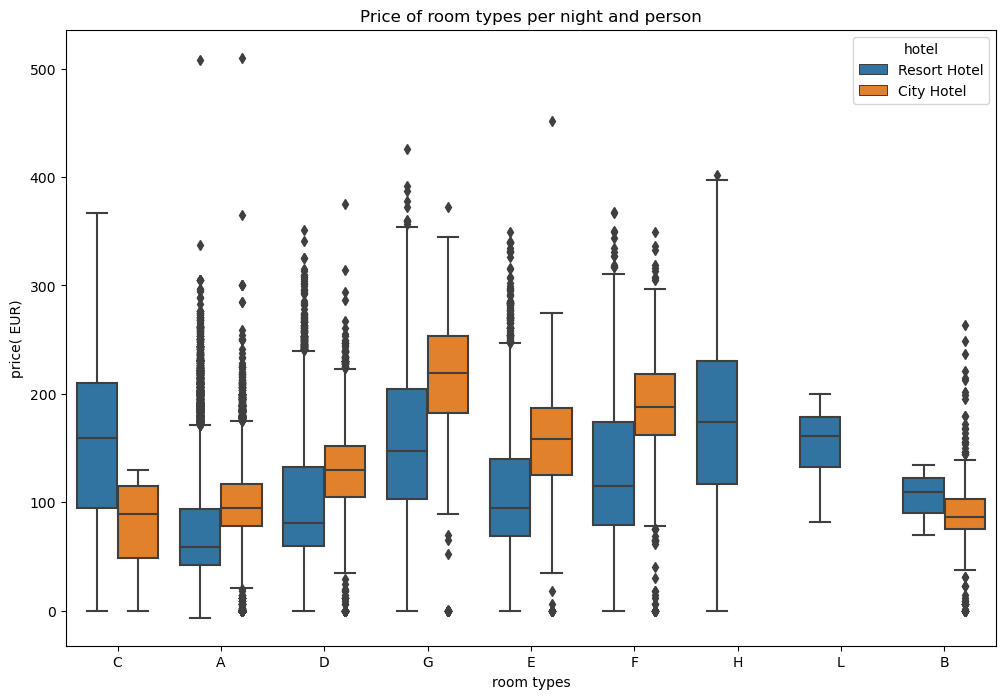

In [62]:
# seaborn boxplot:

plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type', y='adr' , hue='hotel' , data = data_valid)

plt.title('Price of room types per night and person')
plt.xlabel('room types')
plt.ylabel('price( EUR)')

In [63]:
## boxplot basically gives us 25th percentile , 50th percentile(median) , 75th percentile & whiskers 
## whiskers may be defined in different ways in different tools & packages..

## sometimes it shows 99th percentile & 1 percentile value for different package 
## sometimes it shows min & max value for different package  ..

    Above figure shows the various quantile values of price per room depending on its type 
    

# 5.. Which are the most busy month ?

            OR
       How does the price per night vary over the year?

In [64]:
data_valid['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [65]:
data_valid_resort = data_valid[(data_valid['hotel']==\
                                'Resort Hotel')]

data_valid_city = data_valid[(data_valid['hotel']==\
                              'City Hotel')]

In [66]:
data_valid_resort.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015


In [67]:
rush_resort = data_valid_resort['arrival_date_month'].value_counts().\
                reset_index()

rush_resort.columns = ['month','no_of_guests']
rush_resort

,month,no_of_guests
0,August,3153
1,July,3013
2,May,2246
3,October,2209
4,March,2191
5,April,2169
6,February,2053
7,June,1926
8,September,1875
9,November,1744


In [68]:
rush_city = data_valid_city['arrival_date_month'].value_counts().\
            reset_index()

rush_city.columns = ['month','no_of_guests']
rush_city

,month,no_of_guests
0,August,4467
1,July,3834
2,May,3656
3,June,3477
4,March,3469
5,April,3325
6,September,3166
7,October,3070
8,February,2618
9,November,2177


In [69]:
final_rush = rush_resort.merge(rush_city , on='month')

In [70]:
final_rush.columns = ['month','no_of_guests_in_resort',\
                      'no_of_guests_city']

In [71]:
final_rush

,month,no_of_guests_in_resort,no_of_guests_city
0,August,3153,4467
1,July,3013,3834
2,May,2246,3656
3,October,2209,3070
4,March,2191,3469
5,April,2169,3325
6,February,2053,2618
7,June,1926,3477
8,September,1875,3166
9,November,1744,2177


    now we will observe over here is month column is not in order, 
    & if we will visualise we will get improper conclusion
    so very first we have to provide right hierarchy to the month column

In [72]:
## Dependency package needs to be installed first
## !pip install sorted-months-weekdays


#!pip install sort-dataframeby-monthorweek

In [73]:
import sort_dataframeby_monthorweek as sd

In [74]:
final_rush = sd.Sort_Dataframeby_Month(final_rush,'month')

In [75]:
final_rush

,month,no_of_guests_in_resort,no_of_guests_city
0,January,1687,1961
1,February,2053,2618
2,March,2191,3469
3,April,2169,3325
4,May,2246,3656
5,June,1926,3477
6,July,3013,3834
7,August,3153,4467
8,September,1875,3166
9,October,2209,3070


In [76]:
final_rush.columns

Index(['month', 'no_of_guests_in_resort', 'no_of_guests_city'], dtype='object')

In [77]:
px.line(data_frame = final_rush , x='month' , \
        y=['no_of_guests_in_resort', 'no_of_guests_city'])

    Conclusion-->> This clearly shows that the prices in the 
                   Resort hotel are much higher during the summer 
                   The price of the city hotel varies less 
                   and is most expensive during spring and autumn.

In [78]:
'''
from this we can say, August is the most intense month of bookings
ie rush months are  August, July, and September,

'''

'\nfrom this we can say, August is the most intense month of bookings\nie rush months are  August, July, and September,\n\n'

# 6.. which month has highest adr ?

In [79]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [80]:
data = sd.Sort_Dataframeby_Month(data,\
                             'arrival_date_month')

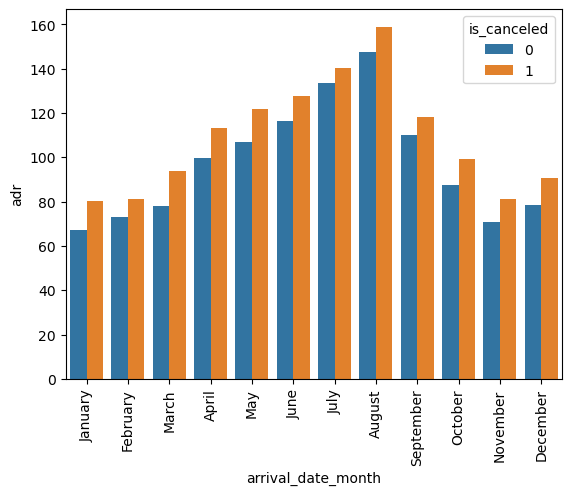

In [81]:
sns.barplot(x='arrival_date_month',y='adr',\
            data=data ,hue='is_canceled' , \
            ci=None )

plt.xticks(rotation='vertical')
plt.show()

### note-->> On y-axis ,it typically consider:
### mean of adr for each of the month ,

#  as by-default estimator=<function mean at 0x00000184B75074C0>

### is_canceled-->> Value indicating if the booking was 
### canceled (1) or not (0)

In [82]:
'''
canceled bookings have higher ADR than not canceled bookings ,
Maybe this higher adr could be one of the reasons 
for canceled bookings.

'''

'\ncanceled bookings have higher ADR than not canceled bookings ,\nMaybe this higher adr could be one of the reasons for canceled bookings.\n\n'

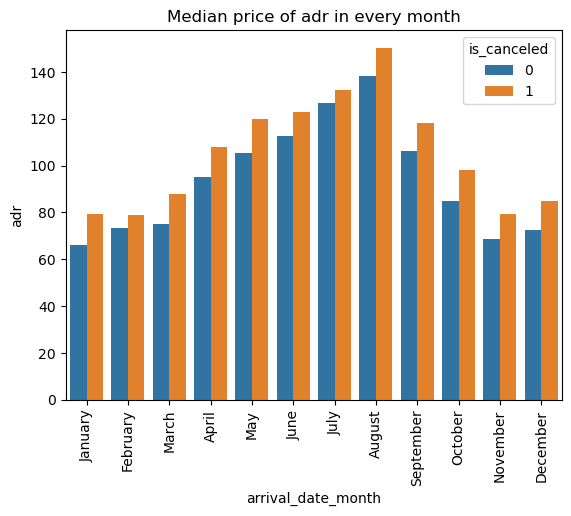

In [83]:
sns.barplot(x='arrival_date_month',y='adr',data=data ,\
            hue='is_canceled' , ci=None , \
            estimator=np.median )

plt.xticks(rotation='vertical')
plt.title("Median price of adr in every month")
plt.show()

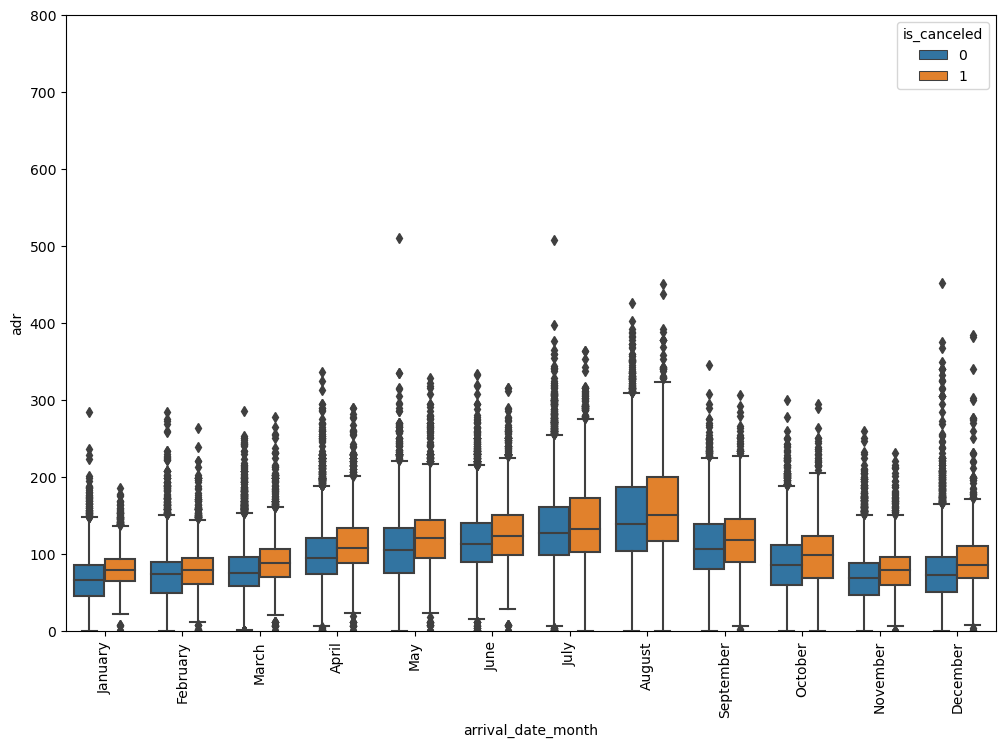

In [84]:
plt.figure(figsize=(12,8))

sns.boxplot(x='arrival_date_month',y='adr',data=data ,\
            hue='is_canceled')

plt.xticks(rotation='vertical')


plt.ylim(0,800)
plt.show()

In [85]:
'''
canceled bookings(1) have higher ADR than not canceled bookings(0) ,
Maybe this higher adr could be one of the reasons 
for cancelled bookings..

'''

'\ncanceled bookings(1) have higher ADR than not canceled bookings(0) ,\nMaybe this higher adr could be one of the reasons for cancelled bookings.\n\n'

In [86]:
### when we need boxplot + distribution plot both , 
### its good to consider violinplot.. 

In [87]:
'''


we can achieve distribution plot by smoothening our histogram 
using KDE ie PDF is a smoothen form of your histogram !
ie histogram -->> apply KDE -->> we will get distribution plot 



This is called density plot bcz here height represents 
how many pts exists at each of these intervals or how dense 
each of the region is !



density(distribution) plot : at a point , what is a density of a data pt. ?
                or
how many percentage of data pts available at some particular pt .. ?
                or 
What is the % of data points that I will encounter at any point ? 
                or
what is the probability of certain data pt in whole data ?
                or 
prob that my data has value has some specific value 



'''

'\n\n\nwe can achieve distribution plot by smoothening our histogram using KDE ie PDF is a smoothen form of your histogram !\nie histogram -->> apply KDE -->> we will get distribution plot \n\n\n\nThis is called density plot bcz here height represents how many pts exists at each of these intervals or how dense \neach of the region is !\n\n\n\ndensity(distribution) plot : at a point , what is a density of a data pt. ?\n                or\nhow many percentage of data pts available at some particular pt .. ?\n                or \nWhat is the % of data points that I will encounter at any point ? \n                or\nwhat is the probability of certain data pt in whole data ?\n                or \nprob that my data has value has some specific value \n\n\n\n'

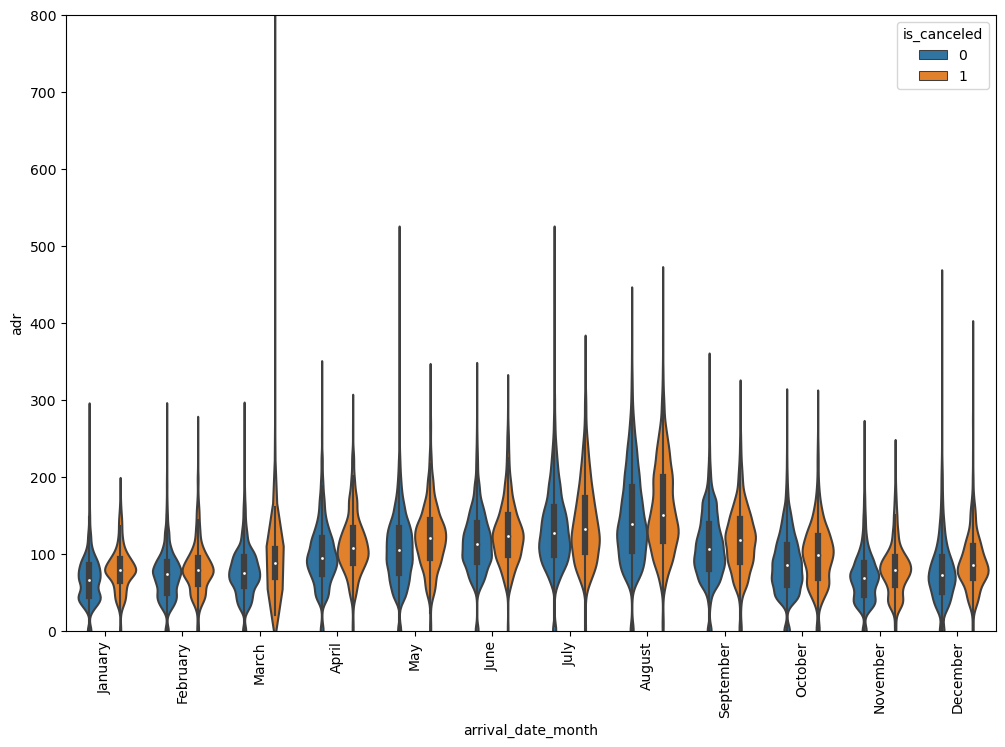

In [88]:
plt.figure(figsize=(12,8))
sns.violinplot(x='arrival_date_month',y='adr',data=data ,hue='is_canceled')
plt.xticks(rotation='vertical')


plt.ylim(0,800)
plt.show()

# 7.. Lets analyse whether bookings were made only for weekdays or for weekends or for both ??

In [89]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
'''
stays_in_weekend_nights =>> Number of weekend nights (Saturday or Sunday) 
                  the guest stayed or booked to stay at the hotel
                  
stays_in_week_nights =>> Number of week nights (Monday to Friday) 
                 the guest stayed or booked to stay at the hotel

'''

In [90]:
## lets define our own function :

def week_function(row):
    feature1='stays_in_weekend_nights'
    feature2='stays_in_week_nights'
    
    if row[feature2]==0 and row[feature1] >0 :
        return 'stay_just_weekend'
    
    elif row[feature2]>0 and row[feature1] ==0 :
        return 'stay_just_weekdays'
    
    elif row[feature2]>0 and row[feature1] >0 :
        return 'stay_both_weekdays_weekends'
    
    else:
        return 'undefined_data'

In [91]:
data['weekend_or_weekday'] = data.apply(week_function,\
                                        axis=1)

In [92]:
data.head(6)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,No Deposit,0,Transient-Party,59.94,0,1,Check-Out,1/2/2016,stay_just_weekdays
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,No Deposit,0,Transient-Party,116.10,1,1,Check-Out,1/2/2016,stay_just_weekdays
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,...,0,No Deposit,0,Transient,89.00,0,1,No-Show,1/1/2016,stay_just_weekdays
3,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,0,No Deposit,0,Transient,73.46,0,2,Check-Out,1/3/2016,stay_just_weekdays
4,Resort Hotel,1,20,2016,January,1,1,0,2,2,...,0,No Deposit,0,Transient,119.00,0,0,Canceled,12/22/2015,stay_just_weekdays
5,Resort Hotel,1,76,2016,January,1,1,1,2,2,...,0,No Deposit,0,Transient,57.90,0,1,Canceled,12/20/2015,stay_both_weekdays_weekends


In [93]:
data['weekend_or_weekday'].value_counts()

## most of the bookings are both for stay_both_weekday_and_weekend

stay_both_weekdays_weekends    46651
stay_just_weekdays             34467
stay_just_weekend               5521
undefined_data                   591
Name: weekend_or_weekday, dtype: int64

In [94]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday'],
      dtype='object')

In [57]:
data.groupby(['arrival_date_month','weekend_or_weekday']).\
                                            size()

arrival_date_month  weekend_or_weekday         
April               stay_both_weekdays_weekends    4525
                    stay_just_weekdays             2891
                    stay_just_weekend               454
                    undefined_data                   30
August              stay_both_weekdays_weekends    6795
                    stay_just_weekdays             3798
                    stay_just_weekend               601
                    undefined_data                   48
December            stay_both_weekdays_weekends    2425
                    stay_just_weekdays             2296
                    stay_just_weekend               324
                    undefined_data                   67
February            stay_both_weekdays_weekends    2996
                    stay_just_weekdays             2629
                    stay_just_weekend               405
                    undefined_data                   53
January             stay_both_weekdays_weekends    1959


In [58]:
group_data = data.groupby(['arrival_date_month',\
                   'weekend_or_weekday']).size().\
                    unstack().reset_index()

In [59]:
group_data

### again month feature is not in a right hierarchy ,
### & if we will visualise this,  we might not get proper conclusion !

weekend_or_weekday,arrival_date_month,stay_both_weekdays_weekends,stay_just_weekdays,stay_just_weekend,undefined_data
0,April,4525,2891,454,30
1,August,6795,3798,601,48
2,December,2425,2296,324,67
3,February,2996,2629,405,53
4,January,1959,2300,379,47
5,July,6214,3210,564,55
6,June,4180,3089,452,35
7,March,3617,3436,387,49
8,May,4319,3347,630,48
9,November,2365,2259,292,57


In [60]:
sorted_data = sd.Sort_Dataframeby_Month(group_data,\
                            'arrival_date_month')

In [61]:
sorted_data.set_index('arrival_date_month',\
                      inplace=True)

In [ ]:
###pd.pivot_table(index = "arrival_date_month" , columns= "weekend_or_weekday" , data = data , aggfunc="count" )["adr"]

In [62]:
sorted_data

,stay_both_weekdays_weekends,stay_just_weekdays,stay_just_weekend,undefined_data
arrival_date_month,,,,
January,1959,2300,379,47
February,2996,2629,405,53
March,3617,3436,387,49
April,4525,2891,454,30
May,4319,3347,630,48
June,4180,3089,452,35
July,6214,3210,564,55
August,6795,3798,601,48
September,3626,2549,484,23


<AxesSubplot:xlabel='arrival_date_month'>

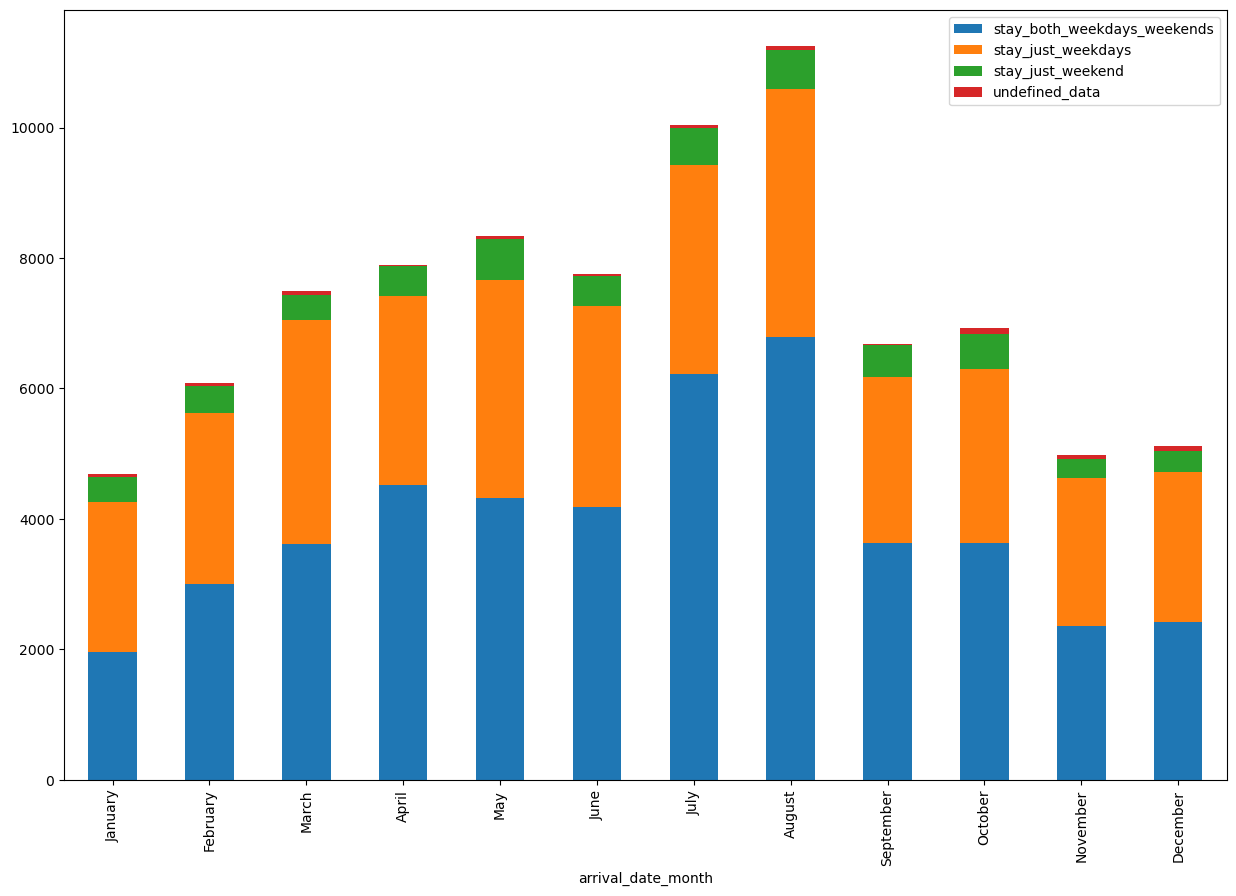

In [63]:
sorted_data.plot(kind='bar',stacked=True,figsize=(15,10))

In [ ]:
'''

above bar graph shows that most bookings were made to stay 
only for weekdays or both weekdays & weekends. 
& there is not significant change in the trend !

'''

# 8.. How to create some more features ..

In [99]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday'],
      dtype='object')

In [100]:
## For a family , it must have adults & (either children or babies or both(children,adults)).. 

def family(row):
    if (row['adults']>0) &  (row['children']>0 or row['babies']>0) :
        return 1
    else:
        return 0
    
## 1 basically means at that particular instance ,we have a family !
## 0 basically means at that particular instance ,we do not have a family !

In [101]:
data['is_family'] = data.apply(family,axis=1)

In [102]:
data['total_customer'] = data['adults'] + data['babies'] + data['children']

In [103]:
data['total_nights_stay'] = data['stays_in_week_nights'] \
                            + data['stays_in_weekend_nights']

In [104]:
data.head(6)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday,is_family,total_customer,total_nights_stay
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,Transient-Party,59.94,0,1,Check-Out,1/2/2016,stay_just_weekdays,0,2.0,1
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,Transient-Party,116.10,1,1,Check-Out,1/2/2016,stay_just_weekdays,1,4.0,1
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,...,Transient,89.00,0,1,No-Show,1/1/2016,stay_just_weekdays,0,2.0,1
3,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,Transient,73.46,0,2,Check-Out,1/3/2016,stay_just_weekdays,0,2.0,2
4,Resort Hotel,1,20,2016,January,1,1,0,2,2,...,Transient,119.00,0,0,Canceled,12/22/2015,stay_just_weekdays,1,4.0,2
5,Resort Hotel,1,76,2016,January,1,1,1,2,2,...,Transient,57.90,0,1,Canceled,12/20/2015,stay_both_weekdays_weekends,0,2.0,3


In [70]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday',
       'is_family', 'total_customer', 'total_nights_stay'],
      dtype='object')

In [71]:
data['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [72]:
dict_deposit = {'No Deposit':0 , 'Non Refund':1 , 'Refundable': 0}

### Wherever 'deposit_type' == 'No Deposit' & 'deposit_type' == 'Refundable' , 
### we can say deposit does not exist there , else deposit exist there..

In [73]:
data['deposit_given'] = data['deposit_type'].\
                        map(dict_deposit)

In [74]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday',
       'is_family', 'total_customer', 'total_nights_stay', 'deposit_given'],
      dtype='object')

In [75]:
# Information of these columns is inside new features, so it is better to drop them.

data.drop(columns=['adults', 'children', 'babies', \
               'deposit_type' , "weekend_or_weekday"],\
          axis=1,inplace=True)

### let me drop "weekend_or_weekday" as i have created 
### this feature only for the analysis purpose ..

In [76]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights_stay', 'deposit_given'],
      dtype='object')

# 9.. how to apply Feature encoding on data 

In [ ]:
## as most of the ml algos will not work well with categorical 
## hence we have to convert it into numerical ones !

In [ ]:
### lets think which encoding technique will work best in such cases !

### if there is no order ,ie nominal data ,we can think of One-hot ,
### but it is not good to use  one-hot if that feature has so 
### many sub-categories as it will cerate curse of dimensionality ,
### ie it creates more features !
    
## if there is an order ,its good to use Label-Encoder !
   

In [77]:
data.head(6)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights_stay,deposit_given
0,Resort Hotel,0,109,2016,January,1,1,0,1,BB,...,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1,0
1,Resort Hotel,0,109,2016,January,1,1,0,1,BB,...,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,1,0
2,Resort Hotel,1,2,2016,January,1,1,0,1,BB,...,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1,0
3,Resort Hotel,0,88,2016,January,1,1,0,2,HB,...,Transient,73.46,0,2,Check-Out,1/3/2016,0,2.0,2,0
4,Resort Hotel,1,20,2016,January,1,1,0,2,BB,...,Transient,119.00,0,0,Canceled,12/22/2015,1,4.0,2,0
5,Resort Hotel,1,76,2016,January,1,1,1,2,BB,...,Transient,57.90,0,1,Canceled,12/20/2015,0,2.0,3,0


In [105]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

In [106]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday',
       'is_family', 'total_customer', 'total_nights_stay'],
      dtype='object')

In [107]:
cat_features = [col for col in data.columns 
                if data[col].dtype=='object']

In [108]:
num_features = [col for col in data.columns 
                if data[col].dtype!='object']

In [109]:
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_family',
 'total_customer',
 'total_nights_stay']

In [110]:
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'weekend_or_weekday']

In [111]:
data_cat = data[cat_features]

In [112]:
data.groupby(['hotel'])['is_canceled'].mean().to_dict()

{'City Hotel': 0.30099110260164436, 'Resort Hotel': 0.23483331370008245}

In [ ]:
### ie where-ever 'city_hotel' is available , 
### replace it with 0.30099110260164436 !

### ie 30 percent bookings have been cancelled for city_hotel 
### & 23 percent bookings have cancelled for 'Resort Hotel'..

In [113]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [114]:
data_cat['cancellation'] = data['is_canceled']

In [115]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,weekend_or_weekday,cancellation
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,No Deposit,Transient-Party,Check-Out,1/2/2016,stay_just_weekdays,0
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,No Deposit,Transient-Party,Check-Out,1/2/2016,stay_just_weekdays,0
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,No Deposit,Transient,No-Show,1/1/2016,stay_just_weekdays,1
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,No Deposit,Transient,Check-Out,1/3/2016,stay_just_weekdays,0
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,No Deposit,Transient,Canceled,12/22/2015,stay_just_weekdays,1


In [116]:
cols = data_cat.columns

In [117]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date', 'weekend_or_weekday', 'cancellation'],
      dtype='object')

In [118]:
cols_for_encoding = cols[0:-1]

In [119]:
cols_for_encoding

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date', 'weekend_or_weekday'],
      dtype='object')

In [120]:
### Perform Mean Encoding Technique 

for col in cols_for_encoding:
    
    dict_enc = data_cat.groupby([col])['cancellation'].\
                mean().to_dict()
    
    data_cat[col] = data_cat[col].map(dict_enc)

In [122]:
data_cat.head(9)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,weekend_or_weekday,cancellation
0,0.234833,0.221345,0.265702,0.397138,0.353849,0.310019,0.260153,0.242250,0.267178,0.152497,0.0,0.066038,0.250965,0
1,0.234833,0.221345,0.265702,0.397138,0.353849,0.310019,0.407718,0.352691,0.267178,0.152497,0.0,0.066038,0.250965,0
2,0.234833,0.221345,0.265702,0.352888,0.353849,0.310019,0.301278,0.242250,0.267178,0.301425,1.0,0.116279,0.250965,1
3,0.234833,0.221345,0.269714,0.251232,0.353849,0.310019,0.260153,0.242250,0.267178,0.301425,0.0,0.137931,0.250965,0
4,0.234833,0.221345,0.265702,0.352888,0.353849,0.310019,0.359512,0.301804,0.267178,0.301425,1.0,0.204545,0.250965,1
5,0.234833,0.221345,0.265702,0.352888,0.353849,0.310019,0.260153,0.306311,0.267178,0.301425,1.0,0.196078,0.304817,1
6,0.234833,0.221345,0.269714,0.251232,0.353849,0.310019,0.260153,0.242250,0.267178,0.301425,0.0,0.137931,0.250965,0
7,0.234833,0.221345,0.269714,0.352888,0.270622,0.148448,0.260153,0.306311,0.947013,0.301425,1.0,0.322581,0.250965,1
8,0.234833,0.221345,0.265702,0.196305,0.353849,0.310019,0.301278,0.235744,0.267178,0.301425,0.0,0.450980,0.304817,0


# 10.. Handle Outliers 

In [123]:
'''

TYpically , Normally distrbuted data is best for ML algo..



So ,There are 2 ways to to achieve normally distrbuted data  :

a) Transformation

b) Normalization/Standardization,

The basic understanding difference between is :
Transformation is used in situation when we have skewness in data 
and in order to remove skewness of the data & make it close to 
Gaussian Distrbution often known as Normal distrbution..



While doing transformation, we can think of any 
mathematical function considering behaviour of data  , 
ie it can be log , square root , cube-root , reciprocal , 
exponent , box-cox & so-on..





On the other hand , 
Normalization is used to rescale the data between 0 and 1 
and make it Gaussian(Normally Distrbuted)..



So in nutshell , Log is a transformation technique..

'''

'\n\nTYpically , Normally distrbuted data is best for ML algo..\n\n\n\nSo ,There are 2 ways to to achieve normally distrbuted data  :\n\na) Transformation\n\nb) Normalization/Standardization,\n\nThe basic understanding difference between is :\nTransformation is used in situation when we have skewness in data \nand in order to remove skewness of the data & make it close to \nGaussian Distrbution often known as Normal distrbution..\n\n\n\nWhile doing transformation, we can think of any \nmathematical function considering behaviour of data  , \nie it can be log , square root , cube-root , reciprocal , exponent , box-cox & so-on..\n\n\n\n\n\nOn the other hand , Normalization is used to rescale the data between 0 and 1 and make it Gaussian(Normally Distrbuted)..\n\n\n\nSo in nutshell , Log is a transformation technique..\n\n'

In [ ]:
'''
explain normal distribution

'''

In [95]:
data[num_features]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights_stay,deposit_given
0,0,109,2016,1,1,0,1,0,0,0,0,0,59.94,0,1,0,2.0,1,0
1,0,109,2016,1,1,0,1,0,0,0,0,0,116.10,1,1,1,4.0,1,0
2,1,2,2016,1,1,0,1,0,0,0,0,0,89.00,0,1,0,2.0,1,0
3,0,88,2016,1,1,0,2,0,0,0,0,0,73.46,0,2,0,2.0,2,0
4,1,20,2016,1,1,0,2,0,0,0,0,0,119.00,0,0,1,4.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87225,0,177,2016,53,30,2,5,0,0,0,0,0,197.50,0,1,1,4.0,7,0
87226,0,173,2016,53,26,3,8,0,0,0,4,0,117.82,0,1,1,3.0,11,0
87227,0,17,2016,53,30,2,5,0,0,0,0,0,90.34,0,1,0,2.0,7,0
87228,0,107,2016,53,31,2,5,0,0,0,0,0,103.57,0,0,0,2.0,7,0


In [156]:
dataframe = pd.concat([data_cat,data[num_features]],axis=1)

In [157]:
dataframe.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'is_family',
       'total_customer', 'total_nights_stay', 'deposit_given'],
      dtype='object')

In [158]:
dataframe.drop(['cancellation'],axis=1,inplace=True)

## as we already have "'is_canceled'" feature ..

In [100]:
dataframe.head(3)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights_stay,deposit_given
0,0.234833,0.221345,0.265702,0.397138,0.353849,0.310019,0.260153,0.242250,0.152497,0.0,...,0,0,0,59.94,0,1,0,2.0,1,0
1,0.234833,0.221345,0.265702,0.397138,0.353849,0.310019,0.407718,0.352691,0.152497,0.0,...,0,0,0,116.10,1,1,1,4.0,1,0
2,0.234833,0.221345,0.265702,0.352888,0.353849,0.310019,0.301278,0.242250,0.301425,1.0,...,0,0,0,89.00,0,1,0,2.0,1,0


<AxesSubplot:xlabel='lead_time', ylabel='Density'>

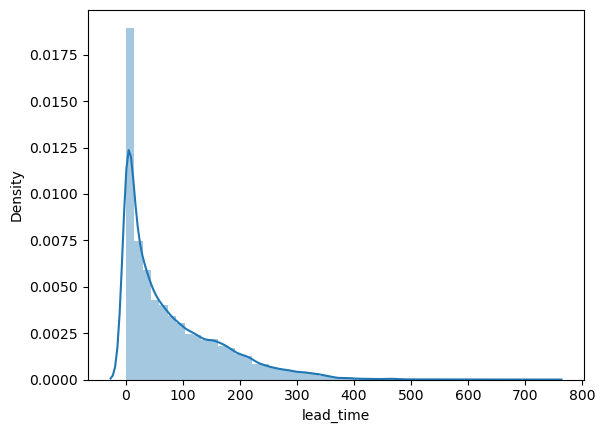

In [159]:
sns.distplot(dataframe['lead_time'])

In [102]:
def handle_outlier(col):
    dataframe[col] = np.log1p(dataframe[col])

In [103]:
dataframe[dataframe['lead_time']<0]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights_stay,deposit_given


In [ ]:
### let me check whether we have negative value in 'lead_time' feature or not
### bcz if we apply ln(1+x) on negative value  , we will get 'nan'
## bcz log wont take negative values..

In [160]:
handle_outlier('lead_time')

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

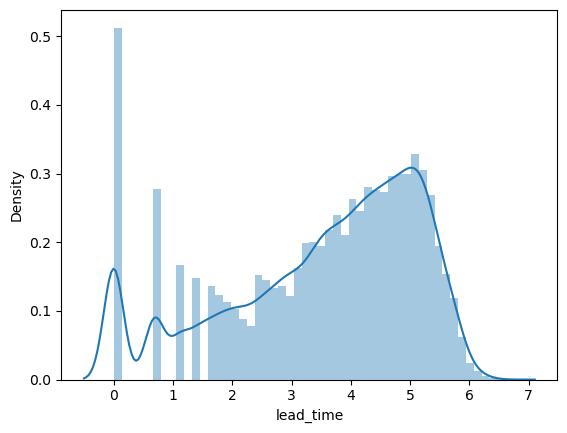

In [105]:
sns.distplot(dataframe['lead_time'])

In [111]:
## adr

<AxesSubplot:xlabel='adr', ylabel='Density'>

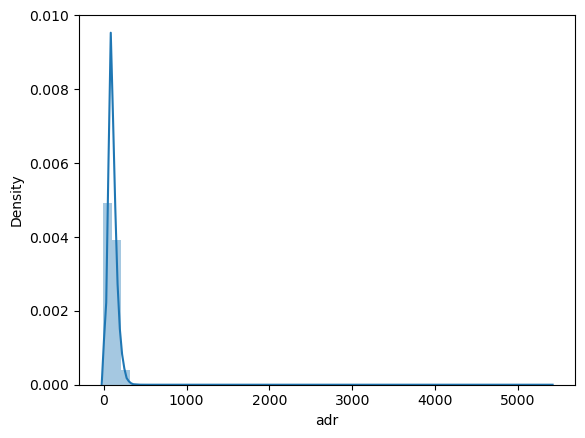

In [106]:
sns.distplot(dataframe['adr'])

In [ ]:
### let me check whether we have negative value in 'adr' feature or not
### bcz if we apply ln(1+x) on negative value , we will get 'nan'
## bcz log wont take negative values..

In [107]:
dataframe[dataframe['adr']<0]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights_stay,deposit_given
11423,0.234833,0.244225,0.265702,0.19033,0.270622,0.148448,0.260153,0.352691,0.152497,0.0,...,2,2,0,-6.38,0,0,0,2.0,10,0


In [161]:
handle_outlier('adr')

In [109]:
dataframe['adr'].isnull().sum()

1

In [124]:
### now why this missing value , as we have already deal with the missing values..'

### bcz we have negative value in 'adr' feature as '-6.38'  
### & if we apply ln(1+x) , we will get 'nan'
## bcz log wont take negative values..

<AxesSubplot:xlabel='adr', ylabel='Density'>

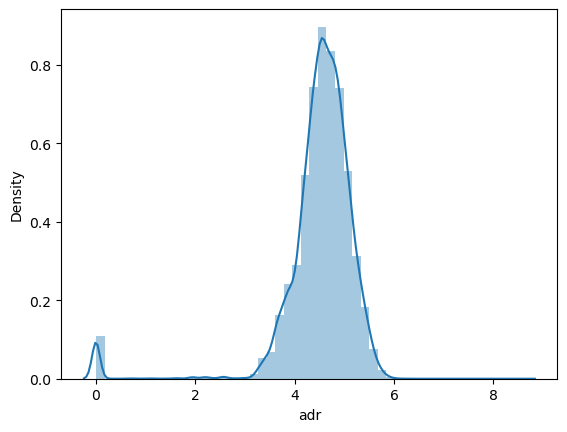

In [110]:
sns.distplot(dataframe['adr'].dropna())

# 11.. Select important Features using Co-relation & univariate analysis..

    ie if we have a complete separation, then that feature is useful !
       if we have a partial separation or partial overlapping, then that feature is certainly useful !
       if we have a high Overlapping , then that feature if doing (univariate analysis) is not that much useful !

In [ ]:
### lets understand how useful is "lead_time" feature if we have to build a ml model !

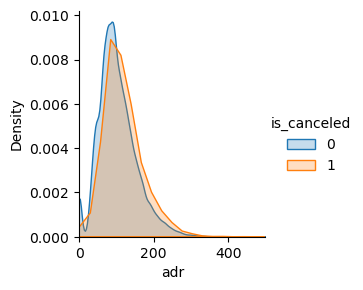

In [111]:
sns.FacetGrid(data,hue='is_canceled',xlim=(0,500)).map(sns.kdeplot,'adr',shade=True).add_legend()

In [ ]:
### highly overlapping ,ie not that much useful if we have to build a model !

In [162]:
corr = dataframe.corr()

In [113]:
corr

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights_stay,deposit_given
hotel,1.000000,-0.001003,0.275466,-0.059678,0.160428,0.132484,-0.153095,0.193058,0.038429,0.072224,...,0.005437,-0.047541,0.034289,0.147500,-0.216564,0.018876,-0.031929,-0.012319,-0.222201,0.045764
arrival_date_month,-0.001003,1.000000,0.023921,-0.043918,0.082084,0.080033,0.099832,-0.005596,0.055842,0.085479,...,-0.021354,0.001166,-0.019560,0.302430,-0.007433,0.053024,0.112088,0.165942,0.104979,-0.004798
meal,0.275466,0.023921,1.000000,-0.039379,0.224106,0.142291,-0.184783,0.189268,0.119420,0.064481,...,-0.030733,-0.055193,-0.031824,0.016763,-0.069946,0.031599,-0.088901,-0.052869,-0.087281,-0.035216
country,-0.059678,-0.043918,-0.039379,1.000000,-0.106186,-0.163507,-0.023595,0.006912,0.004620,0.192329,...,0.087739,-0.002152,0.013807,-0.095343,0.039794,-0.061208,0.024575,-0.053047,-0.110260,0.090426
market_segment,0.160428,0.082084,0.224106,-0.106186,1.000000,0.633408,0.076746,0.054194,0.187239,0.221252,...,-0.140415,-0.073983,-0.048316,0.253176,-0.058248,0.263128,0.065234,0.167034,-0.005738,-0.052581
distribution_channel,0.132484,0.080033,0.142291,-0.163507,0.633408,1.000000,-0.000021,0.052052,0.003846,0.152465,...,-0.191294,-0.108225,0.022073,0.150008,-0.134517,0.140318,0.007039,0.139085,0.133229,0.017270
reserved_room_type,-0.153095,0.099832,-0.184783,-0.023595,0.076746,-0.000021,1.000000,-0.292643,0.092412,0.056574,...,-0.038415,0.018145,-0.036486,0.207666,0.080005,0.034350,0.357836,0.420929,0.114469,-0.056599
assigned_room_type,0.193058,-0.005596,0.189268,0.006912,0.054194,0.052052,-0.292643,1.000000,0.006819,0.091754,...,0.010616,-0.065043,0.014248,0.060461,-0.069558,-0.040829,-0.055260,-0.117856,-0.044535,0.063041
customer_type,0.038429,0.055842,0.119420,0.004620,0.187239,0.003846,0.092412,0.006819,1.000000,0.127234,...,0.021010,-0.143339,-0.122926,0.112338,0.033177,0.088208,0.081018,0.113707,-0.032628,0.001539
reservation_status,0.072224,0.085479,0.064481,0.192329,0.221252,0.152465,0.056574,0.091754,0.127234,1.000000,...,-0.052178,-0.093236,0.004710,0.119565,-0.184456,-0.120794,0.050223,0.098973,0.085431,0.165058


In [163]:
corr['is_canceled'].sort_values(ascending = False)

reservation_status                1.000000
is_canceled                       1.000000
reservation_status_date           0.308647
lead_time                         0.239696
market_segment                    0.221252
country                           0.192329
deposit_given                     0.165058
distribution_channel              0.152465
customer_type                     0.127234
adr                               0.119565
total_customer                    0.098973
assigned_room_type                0.091754
arrival_date_year                 0.088020
arrival_date_month                0.085479
total_nights_stay                 0.085431
stays_in_week_nights              0.084159
hotel                             0.072224
meal                              0.064481
stays_in_weekend_nights           0.060992
reserved_room_type                0.056574
previous_cancellations            0.051501
is_family                         0.050223
arrival_date_day_of_month         0.005449
days_in_wai

In [164]:
corr['is_canceled'].abs().sort_values(ascending=False)

reservation_status                1.000000
is_canceled                       1.000000
reservation_status_date           0.308647
lead_time                         0.239696
market_segment                    0.221252
country                           0.192329
required_car_parking_spaces       0.184456
deposit_given                     0.165058
distribution_channel              0.152465
customer_type                     0.127234
total_of_special_requests         0.120794
adr                               0.119565
total_customer                    0.098973
booking_changes                   0.093236
assigned_room_type                0.091754
is_repeated_guest                 0.088764
arrival_date_year                 0.088020
arrival_date_month                0.085479
total_nights_stay                 0.085431
stays_in_week_nights              0.084159
hotel                             0.072224
meal                              0.064481
stays_in_weekend_nights           0.060992
reserved_ro

In [165]:
corr['is_canceled'].abs().sort_values(ascending=False).index

Index(['reservation_status', 'is_canceled', 'reservation_status_date',
       'lead_time', 'market_segment', 'country', 'required_car_parking_spaces',
       'deposit_given', 'distribution_channel', 'customer_type',
       'total_of_special_requests', 'adr', 'total_customer', 'booking_changes',
       'assigned_room_type', 'is_repeated_guest', 'arrival_date_year',
       'arrival_date_month', 'total_nights_stay', 'stays_in_week_nights',
       'hotel', 'meal', 'stays_in_weekend_nights', 'reserved_room_type',
       'previous_bookings_not_canceled', 'previous_cancellations', 'is_family',
       'arrival_date_day_of_month', 'days_in_waiting_list',
       'arrival_date_week_number'],
      dtype='object')

In [ ]:
    From this list it is apparent that lead_time, total_of_special_requests, required_car_parking_spaces, booking_changes and previous_cancellations are the 5 most important numerical features.
    However, to predict whether or not a booking will be canceled, 
    the number of booking changes is a possible source of leakage, because this information can change over time.
    I will also not include days_in_waiting_list,booking changes  and arrival_date_year.

    The most important feature to exclude is the "reservation_status":

In [166]:
features_to_drop=['reservation_status']

In [ ]:
'''

features_to_drop=['reservation_status', 'reservation_status_date','arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month']


'''

In [169]:
dataframe.drop(features_to_drop,axis=1,inplace=True)

In [170]:
dataframe.shape

(87230, 29)

In [167]:
#dataframe2 = dataframe.copy()

In [168]:
dataframe2.shape

(87230, 30)

# 12.. How to find Important features for model building..

In [171]:
dataframe.head(2)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status_date,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights_stay,deposit_given
0,0.234833,0.221345,0.265702,0.397138,0.353849,0.310019,0.260153,0.242250,0.152497,0.066038,...,0,0,0,4.109890,0,1,0,2.0,1,0
1,0.234833,0.221345,0.265702,0.397138,0.353849,0.310019,0.407718,0.352691,0.152497,0.066038,...,0,0,0,4.763028,1,1,1,4.0,1,0


In [122]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
customer_type                     0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
is_family                         0
total_customer                    4
total_nights_stay                 0
deposit_given               

In [172]:
dataframe.dropna(inplace=True)

In [ ]:
## separate dependent & independent features

In [173]:
x = dataframe.drop('is_canceled',axis=1)

In [174]:
y = dataframe['is_canceled']

In [175]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
##Lasso(alpha=0.005)
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.


In [176]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005))

In [177]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [178]:
feature_sel_model.get_support()

array([False, False, False,  True,  True, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False])

In [179]:
cols = x.columns

In [180]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status_date', 'lead_time',
       'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_family', 'total_customer',
       'total_nights_stay', 'deposit_given'],
      dtype='object')

In [181]:
# let's print the number of selected features

selected_features = cols[feature_sel_model.get_support()]

In [182]:
selected_features

Index(['country', 'market_segment', 'reservation_status_date', 'lead_time',
       'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_customer'],
      dtype='object')

In [183]:
x_selected_df = x[selected_features]

In [184]:
y

0        0
1        0
2        1
3        0
4        1
        ..
87225    0
87226    0
87227    0
87228    0
87229    0
Name: is_canceled, Length: 87225, dtype: int64

# 13.. Lets build ML model..

In [138]:
from sklearn.model_selection import train_test_split

In [185]:
X_train, X_test, y_train, y_test = train_test_split( x_selected_df, y, test_size=0.25)

In [186]:
X_train.shape

(65418, 17)

In [187]:
from sklearn.linear_model import LogisticRegression

In [188]:
logreg = LogisticRegression()

In [189]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [190]:
pred = logreg.predict(X_test)

In [191]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [192]:
from sklearn.metrics import confusion_matrix

In [193]:
confusion_matrix(y_test,pred)

array([[15053,   731],
       [ 4697,  1326]], dtype=int64)

In [194]:
from sklearn.metrics import accuracy_score

In [195]:
accuracy_score(y_test,pred)

0.7510890998303297

# 14.. How to save & cross-validate model..

In [180]:
from sklearn.model_selection import cross_val_score

In [181]:
score = cross_val_score(logreg,x,y,cv=10)

In [182]:
score

array([0.73426573, 0.75295197, 0.73655852, 0.7335779 , 0.74332225,
       0.73171291, 0.7358404 , 0.77401972, 0.77562486, 0.74099977])

In [183]:
score.mean()

0.7458874033894427

# 15.. playing with multiple algos..

In [196]:


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [197]:
models=[]

models.append(('LogisticRegression',LogisticRegression()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('Decision_tree',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))


In [198]:
for name,model in models:
    print(name)
    model.fit(X_train,y_train)
    
    predictions=model.predict(X_test)
    
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    
    from sklearn.metrics import accuracy_score
    acc=accuracy_score(predictions,y_test)
    print(acc)
    print('\n')

LogisticRegression
[[15053  4697]
 [  731  1326]]
0.7510890998303297


Naive_bayes
[[ 2793   114]
 [12991  5909]]
0.399046177832806


Random Forest
[[15045  1736]
 [  739  4287]]
0.8865043334709038


Decision_tree
[[14016  1788]
 [ 1768  4235]]
0.8369330948777916


KNN
[[13720  3701]
 [ 2064  2322]]
0.7356353464483881


